In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
marathon = pd.read_csv("./data/marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
marathon.head(5)

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


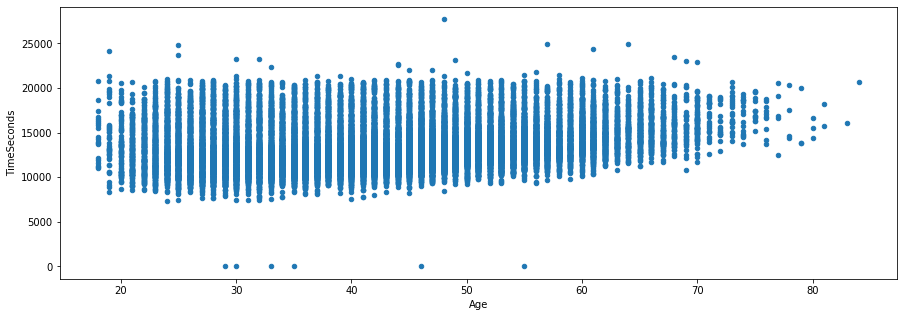

In [6]:
marathon.plot.scatter(x='Age', y='TimeSeconds', figsize=(15,5))

In [8]:
marathon_m = marathon[marathon['M/F'] == 'M']
marathon_m.head()

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


In [10]:
marathon_f = marathon[marathon['M/F'] == 'F']
marathon_f.head()

,Age,M/F,Country,40K,TimeSeconds
20,37,F,KEN,2:14:43,8083.0
23,27,F,BRN,2:15:42,8142.0
24,25,F,USA,2:15:54,8154.0
33,33,F,USA,2:17:25,8245.0
43,33,F,KEN,2:19:07,8347.0


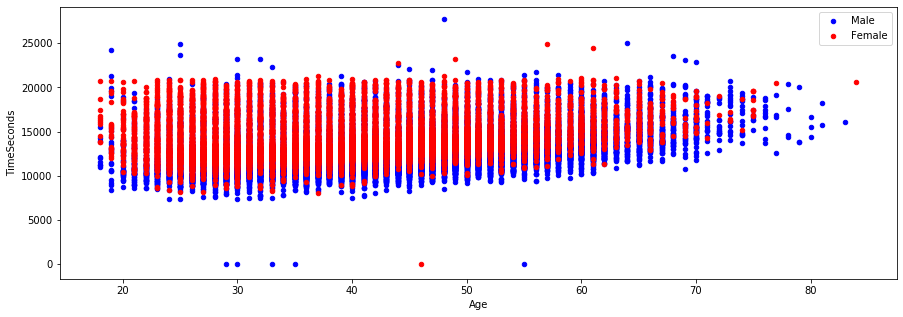

In [18]:
am = marathon_m.plot.scatter(x="Age", y='TimeSeconds', color='Blue', label='Male', figsize=(15,5))
marathon_f.plot.scatter(x="Age", y='TimeSeconds', color='Red', label='Female', figsize=(15,5), ax=am)

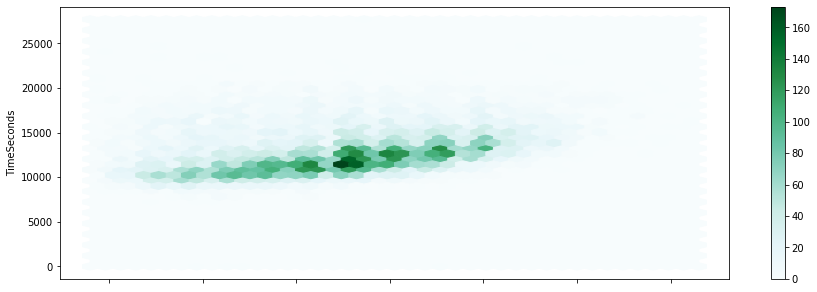

In [28]:
marathon_m.plot.hexbin(x="Age", y='TimeSeconds', gridsize=40, figsize=(15,5))

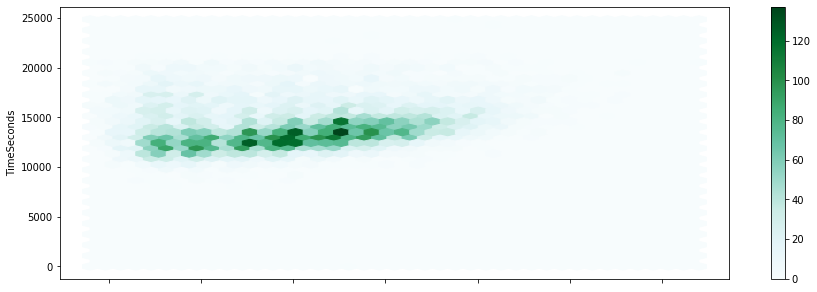

In [37]:
marathon_f.plot.hexbin(x="Age", y='TimeSeconds', gridsize=40, figsize=(15,5))

In [42]:
import datetime

#Import data
nasa = pd.read_csv("./data/nasa_facebook_statuses.csv",
usecols=["status_published","num_likes"])
 
#Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
 
#Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-5-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
 
#Add column with day only
nasa['day'] = nasa.apply(lambda row: row["status_published"].day,axis=1)

#Group all columns by sum
nasa_by_day = nasa.groupby(by='day').sum()

#Import data
bean = pd.read_csv("./data/mrbean_facebook_statuses.csv",usecols=["status_published","num_likes"])
 
#Convert column type to date time
bean["status_published"] = pd.to_datetime(bean["status_published"])
 
#Select observations between two datetimes - May 2015
filter =(bean['status_published'] >= '2016-5-1') & (bean['status_published'] < '2016-6-1')
bean = bean[filter]

#Add column with day only
bean['day'] = bean.apply(lambda row: row["status_published"].day,axis=1)

#Group all columns by sum
bean_by_day = bean.groupby(by='day').sum()
days = nasa["day"].append(bean["day"])
days = days.unique()
fb = pd.DataFrame(index=days).sort_index()

fb['nasa'] = nasa_by_day["num_likes"]
fb['bean'] = bean_by_day["num_likes"]
fb.fillna(value=0, inplace=True)

fb.head()

,nasa,bean
1,60243,0.0
2,177989,0.0
3,50264,0.0
4,133302,26821.0
5,89657,0.0


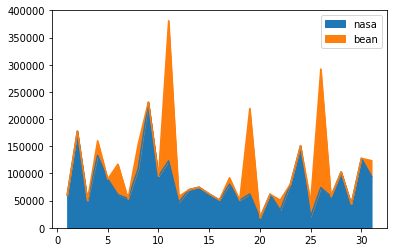

In [43]:
fb.plot(kind="area")